# Customer Churn Analysis

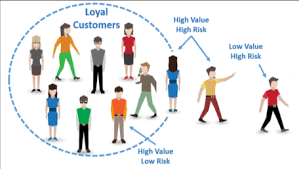

## Problem Statement:


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Feature Columns:


1 gender

2 SeniorCitizen

3 Partner

4 Dependents

5 tenure

6 PhoneService

7 MultipleLines

8 InternetService

9 OnlineSecurity

10 OnlineBackup

11 DeviceProtection

12 TechSupport

13 StreamingTV

14 StreamingMovies

15 Contract

16 PaperlessBilling

17 PaymentMethod

18 MonthlyCharges

19 TotalCharges



## Target/Label Column:



Churn

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

### Loading the Dataset.

In [7]:

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.shape



(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
CDF.nunique() #unique elements in each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### checking for null values

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There do not appear to be any null values.

### Checking for blank spaces, random characters in each column.

In [11]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
col = ['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for c in col:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((CDF[c] == s).sum())

  in customerID =  0
? in customerID =  0
- in customerID =  0
 ? in customerID =  0
 - in customerID =  0
?  in customerID =  0
-  in customerID =  0
 ?  in customerID =  0
 -  in customerID =  0
NA in customerID =  0
N/A in customerID =  0
 NA in customerID =  0
 N/A in customerID =  0
  in gender =  0
? in gender =  0
- in gender =  0
 ? in gender =  0
 - in gender =  0
?  in gender =  0
-  in gender =  0
 ?  in gender =  0
 -  in gender =  0
NA in gender =  0
N/A in gender =  0
 NA in gender =  0
 N/A in gender =  0
  in SeniorCitizen =  0
? in SeniorCitizen =  0
- in SeniorCitizen =  0
 ? in SeniorCitizen =  0
 - in SeniorCitizen =  0
?  in SeniorCitizen =  0
-  in SeniorCitizen =  0
 ?  in SeniorCitizen =  0
 -  in SeniorCitizen =  0
NA in SeniorCitizen =  0
N/A in SeniorCitizen =  0
 NA in SeniorCitizen =  0
 N/A in SeniorCitizen =  0
  in Partner =  0
? in Partner =  0
- in Partner =  0
 ? in Partner =  0
 - in Partner =  0
?  in Partner =  0
-  in Partner =  0
 ?  in Partner =

In the column total Charges null values are present.

In [12]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan) #converting blank values to null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df['TotalCharges']= df['TotalCharges'].astype(float)

### Getting the basic summary 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.dtypes[df.dtypes == 'object'] #Identifying the Categorical Columns

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [18]:
df.dtypes[df.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

### Statistical information of the data.

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Visualising Null values in TotalCharges

<AxesSubplot:xlabel='TotalCharges'>

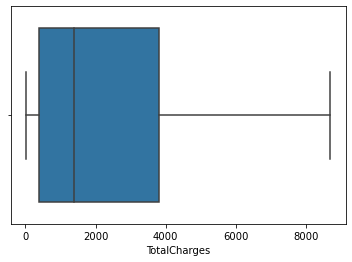

In [19]:
sns.boxplot(df.TotalCharges)

### Using KNN Imputation technique for imputing missing data.

In [24]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
df[['TotalCharges']] = imp.fit_transform(df[['TotalCharges']])
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dropping column customerID since it doesn't contribute to building a good model for predicting the target variable values.

In [25]:
df.drop(columns='customerID',inplace=True)
df.shape

(7043, 20)

### Interpreting Relationship between Independent and Dependent Variables


#### Analyzing the Target Class

In [26]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

### There are 2 unique catergorical values in the Label column / target variable.


In [27]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Class

'No' : Has 5174 values

'Yes' : Has 1869 values

<AxesSubplot:xlabel='Churn', ylabel='count'>

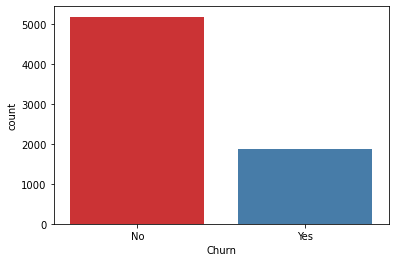

In [28]:
sns.countplot(df['Churn'], palette="Set1")

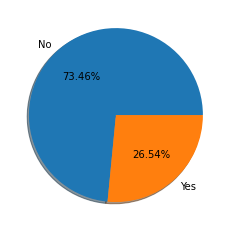

In [29]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(CDF['Churn'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


Class

'No' : Has 73.46% of total values

'Yes' : Has 26.54% of total values

### Classes are imbalanced.


### Analyzing Feature column Catergorical Classes

In [30]:
df.dtypes[CDF.dtypes == 'object'] #Identifying the Categorical Columns

gender               object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
TotalCharges        float64
Churn                object
dtype: object

In [31]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

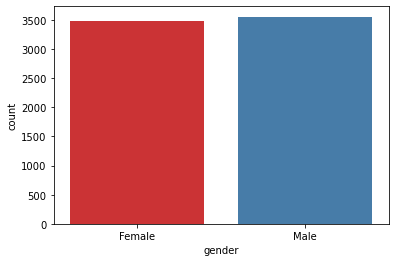

In [32]:
sns.countplot(df['gender'], palette="Set1")

Number of Female and Male customers are fairly balanced.

In [33]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

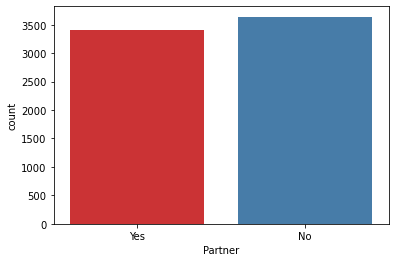

In [34]:
sns.countplot(df['Partner'], palette="Set1")

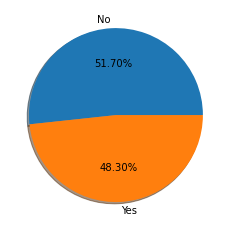

In [37]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Partner'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True)
plt.show()

48.03% of customers are Partners.

In [38]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

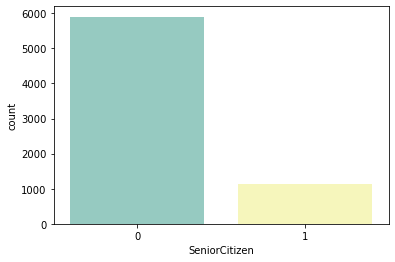

In [43]:
sns.countplot(df['SeniorCitizen'], palette="Set3")

Majority of customers are not Senior Citizens.

In [40]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

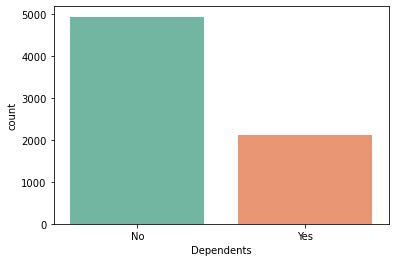

In [42]:
sns.countplot(CDF['Dependents'], palette="Set2")

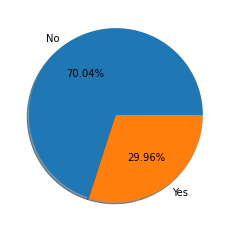

In [44]:
labels = 'No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Dependents'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

70.04% customers are Dependents while 29.96% are not.

In [45]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

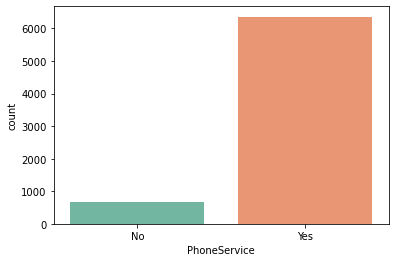

In [48]:
sns.countplot(df['PhoneService'], palette="Set2")

Majority of customers use PhoneService.



In [49]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

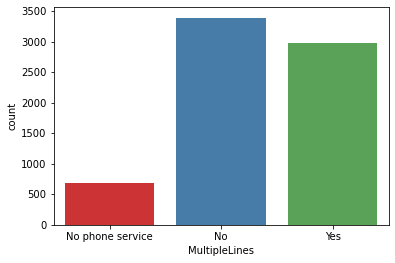

In [50]:
sns.countplot(df['MultipleLines'], palette="Set1")

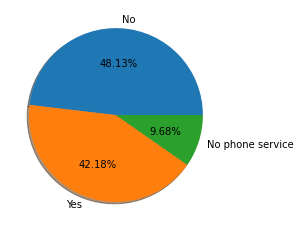

In [51]:
labels = 'No','Yes','No phone service'
fig, ax = plt.subplots()
ax.pie(df['MultipleLines'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

48.13% do not have multiple lines, while 42.18% do and 9.68% don't have phone service.

In [52]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

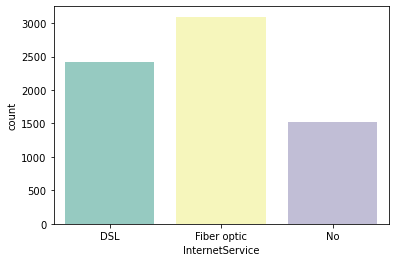

In [54]:
sns.countplot(df['InternetService'], palette="Set3")

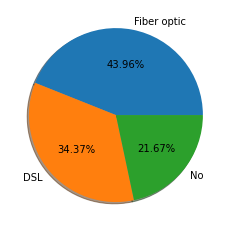

In [55]:
labels = 'Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(df['InternetService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

43.96% customers have Fiber optic Internet connection, 34.37% have DSL internet connection while 21.67% have no internet connection.


In [56]:

df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

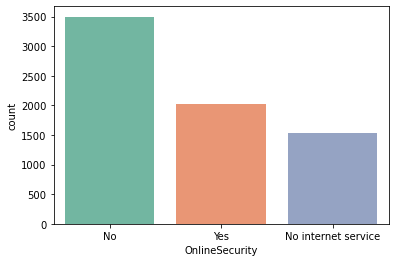

In [57]:
sns.countplot(df['OnlineSecurity'], palette="Set2")

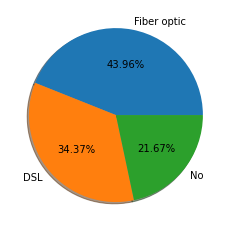

In [58]:
labels = 'Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(df['InternetService'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


In [59]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

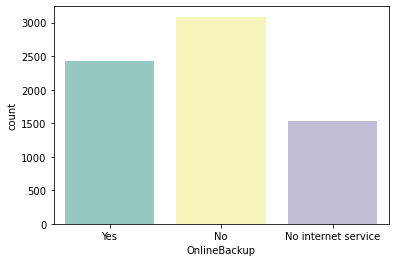

In [61]:

sns.countplot(df['OnlineBackup'], palette="Set3")

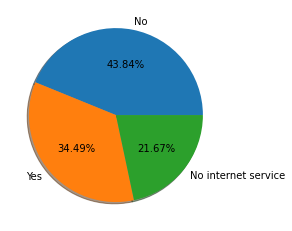

In [62]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(df['OnlineBackup'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


43.84% customers do not have Online backup and 34.49% do while 21.67% don't have internet service.


In [63]:

df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

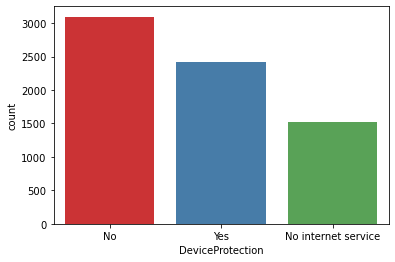

In [66]:
sns.countplot(df['DeviceProtection'], palette="Set1")

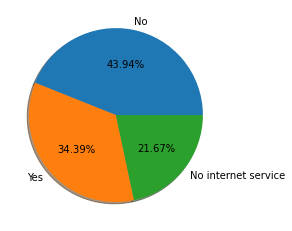

In [65]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(df['DeviceProtection'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


43.94% customers do not have Device Protection and 34.39% do while 21.67% don't have internet service.

In [67]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

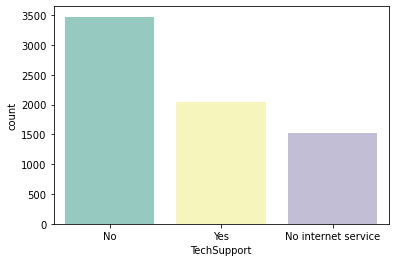

In [68]:


sns.countplot(df['TechSupport'], palette="Set3")

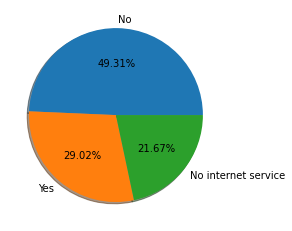

In [69]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(df['TechSupport'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

49.31% customers do not avail Tech Support and 29.02% do while 21.67% don't have internet service.


In [70]:

df['StreamingTV'].value_counts()



No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

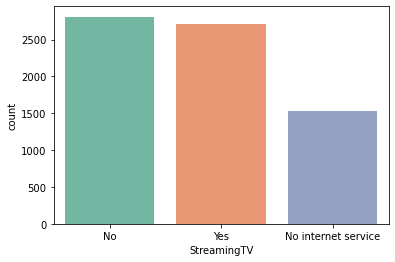

In [71]:
sns.countplot(df['StreamingTV'], palette="Set2")

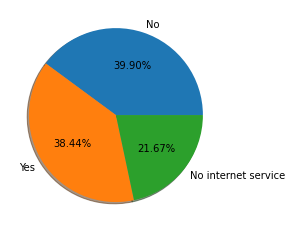

In [72]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(df['StreamingTV'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.90% customers do not avail StreamingTV service and 38.44% do while 21.67% don't have internet service.

In [73]:


df['StreamingMovies'].value_counts()


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

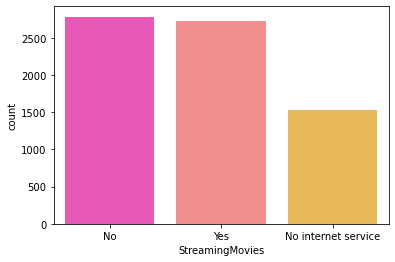

In [74]:

sns.countplot(df['StreamingMovies'], palette="spring")

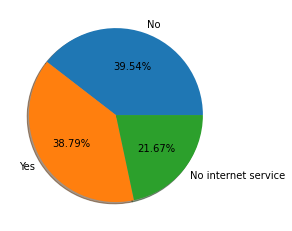

In [75]:
labels = 'No','Yes','No internet service'
fig, ax = plt.subplots()
ax.pie(df['StreamingMovies'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

39.54% customers do not avail StreamingMovies service and 38.54% do while 21.67% don't have internet service.


In [76]:

df['Contract'].value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

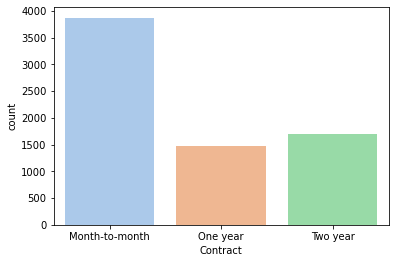

In [77]:

sns.countplot(df['Contract'], palette="pastel")

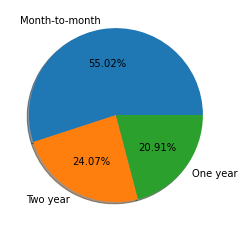

In [78]:
labels = 'Month-to-month','Two year','One year'
fig, ax = plt.subplots()
ax.pie(df['Contract'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

55.02% customers have Month-to-month subscription contract and 24.07% customers have Two year subscription contract while 20.91% customers have One year subscription contract.


In [79]:

df['PaperlessBilling'].value_counts()


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

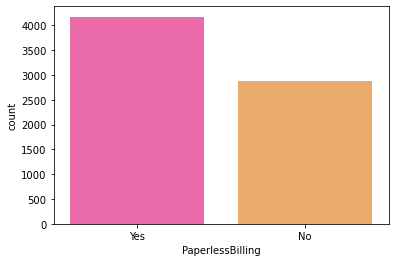

In [81]:

sns.countplot(df['PaperlessBilling'], palette="spring")

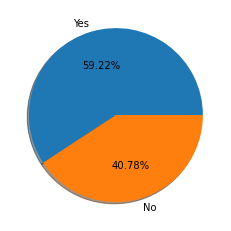

In [82]:
labels = 'Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PaperlessBilling'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()



59.22% customers receive PaperlessBilling and 40.78% customers don't.

In [83]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

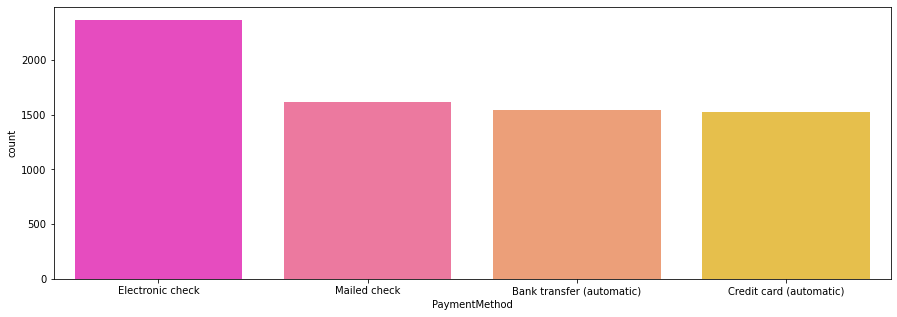

In [85]:

plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['PaymentMethod'], palette="spring")

Majority of subscribers pay via Electronic check.

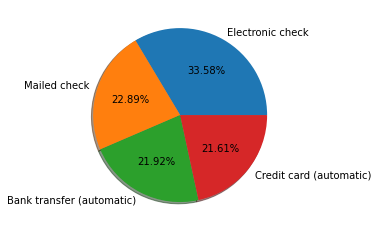

In [86]:
labels = 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
fig, ax = plt.subplots()
ax.pie(df['PaymentMethod'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

33.58% customers pay via Electronic check

22.89% customers pay via Mailed check

21.92% customers pay via Bank transfer (automatic) 

21.61% customers pay via Credit card (automatic)

### Analyzing Feature columns with Continuous Data.

In [88]:
df.dtypes[df.dtypes != 'object']#Identifying the Continuous/discrete Columns

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

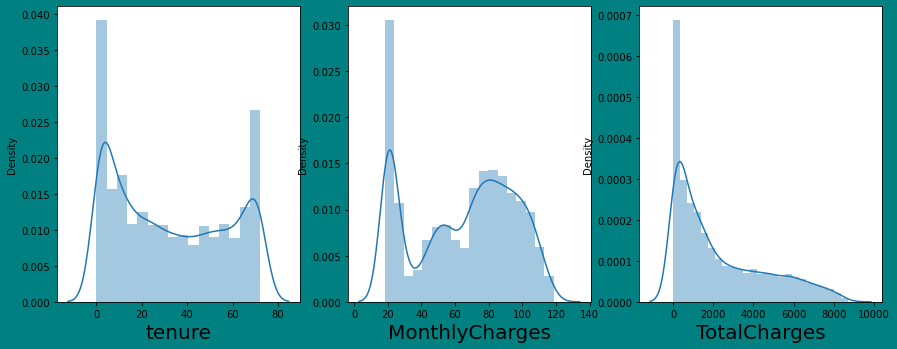

In [90]:
plt.figure(figsize=(20,25),facecolor='teal')
plotnum=1
for col in df[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


Tenure has bimodal distribution and MonthlyCharges has Multimodal distribution. Total Charges data distribution is skewed.



In [91]:

df[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

TotalCharges data distribution is skewed.



### Interpreting Relationship between Dependent Variable and Independent Variables

'Churn' vs Continuous/Discrete Data Columns

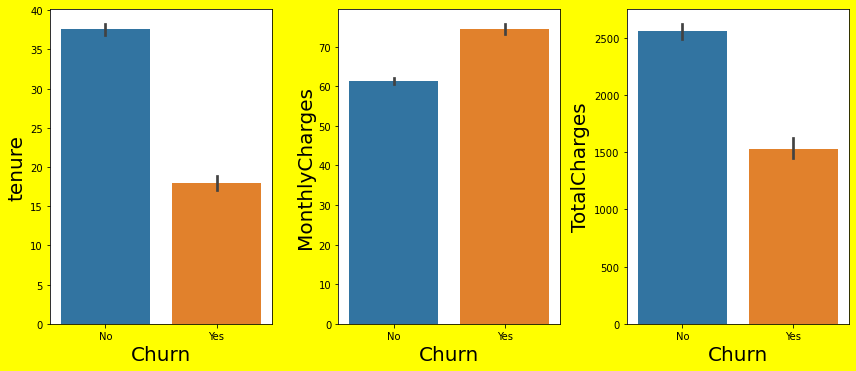

In [92]:

plt.figure(figsize=(20,25),facecolor='yellow')
plotnum=1
y = df['Churn']
X = df[['tenure','MonthlyCharges','TotalCharges']]
for col in X:
    if plotnum<=15:
        plt.subplot(5,5,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('Churn',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

Majority of customers who are retained have higher tenure period while majority churn depends on lower tenure.

Higher monthly Charges result in greater Churn rates.

Customers who have paid greater charges in total are retained while those who paid lesser contribute more to churn rate.



### 'Churn' vs Categorical Data Columns

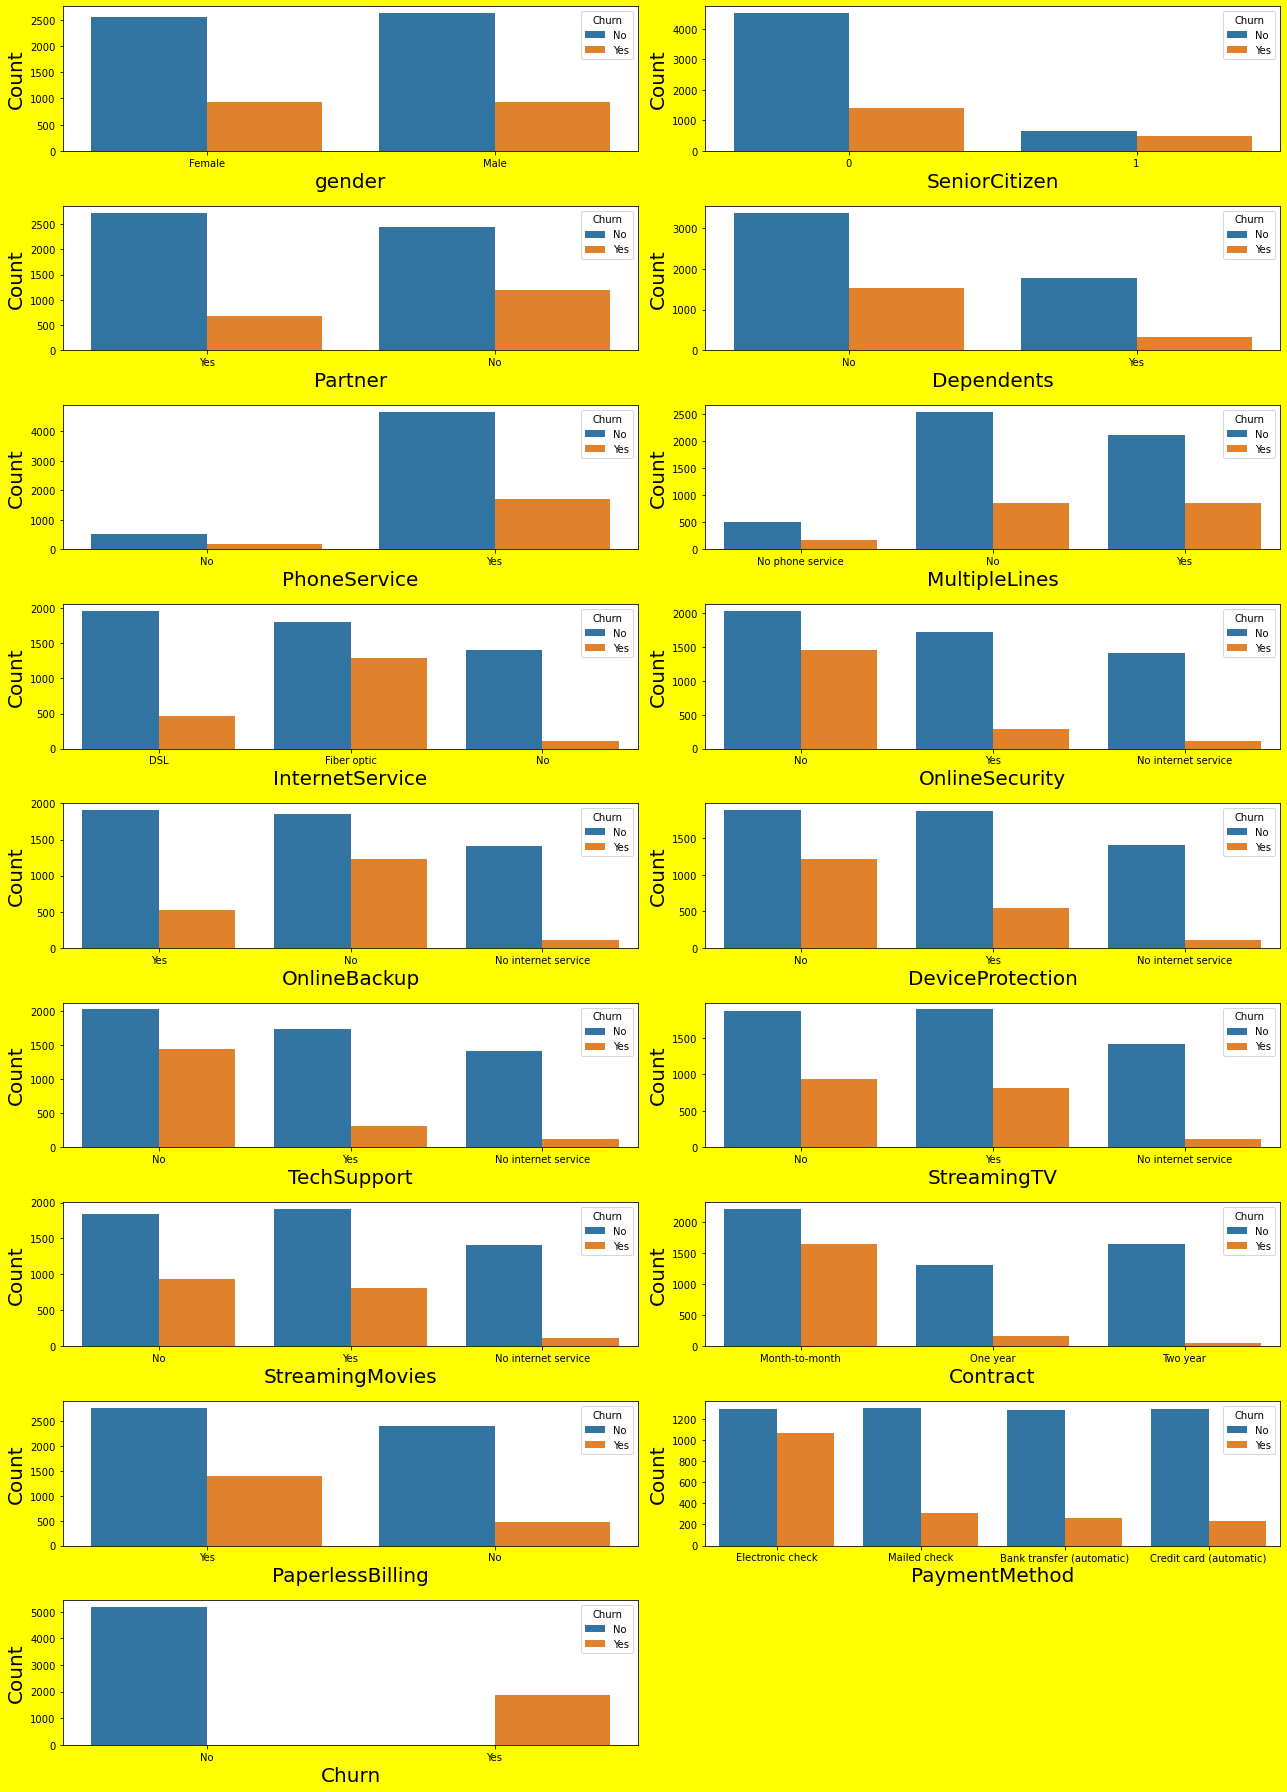

In [94]:
plt.figure(figsize=(18,25),facecolor='yellow')
plotnum=1
y = df['Churn']
X = df.drop(columns = ['tenure','MonthlyCharges','TotalCharges'])
for col in X:
    if plotnum<=23:
        plt.subplot(9,2,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Gender doesn't seem to be a good indicator of churn rate.

Senior Citizen doesn't seem to be a good indicator of churn rate.

Those who are not Partners contribute somewhat to churn rate.

Those who are dependents contribute less to churn rate, while those who aren't contribute more to Churn rate.

Those who avail PhoneService are retained more.

Those who do not have multiple lines are retained more.

Those who avail Fiber optic Internet service contribute more to churn rate.

Those who do not avail to Online Security contribute most to churn rate.

Those who do not avail to Online Backup contribute most to churn rate.

Those who do not avail to Device Protection contribute most to churn rate.

Those who do not avail to Tech Support contribute most to churn rate.

StreamingTv doesn't seem to be a good indicator of churn rate.

StreamingMovies doesn't seem to be a good indicator of churn rate.

Customers who have a month - to- month subscription contract are more likely to contribute to churn rate.

Customers who avail Paperless billing contribute more to churn rate.

Customers who pay via Electronic Check contribute more to churn rate.

### Checking for Outliers in columns with continuous distribution


In [95]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

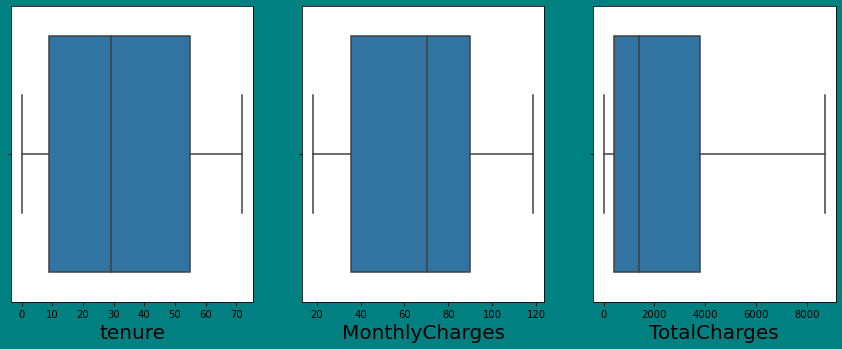

In [96]:
plt.figure(figsize=(20,25),facecolor='teal')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=16:
        plt.subplot(4,4,plotnum)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are no outliers present.



### Checking for Skewness in Data

In [97]:
X[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

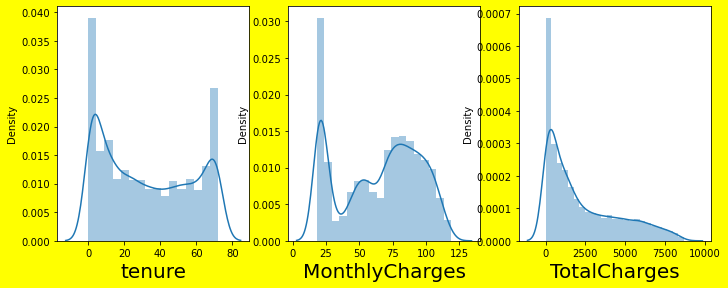

In [98]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnum=1
for col in X[['tenure','MonthlyCharges','TotalCharges']]:
    if plotnum<=35:
        plt.subplot(5,5,plotnum)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


Considerable skewness exists in the data distribution of TotalCharges.

### Reducing skewness further using PowerTransformer

In [99]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)
df4 = X[['TotalCharges']]
transformed= powtrans.fit_transform(df4)
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe
transformed.skew()

TotalCharges   -0.144899
dtype: float64

In [100]:
transformed.index = df.index


In [101]:
df[['TotalCharges']]=transformed[['TotalCharges']]
df[['tenure','MonthlyCharges','TotalCharges']].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

### Encoding the categorical Feature Columns.
Encoding using OrdinalEncoder()

In [102]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [106]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=enc.fit_transform(CDF[col].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


### Finding Correlation

In [108]:
C_corr = df.corr()
C_corr


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


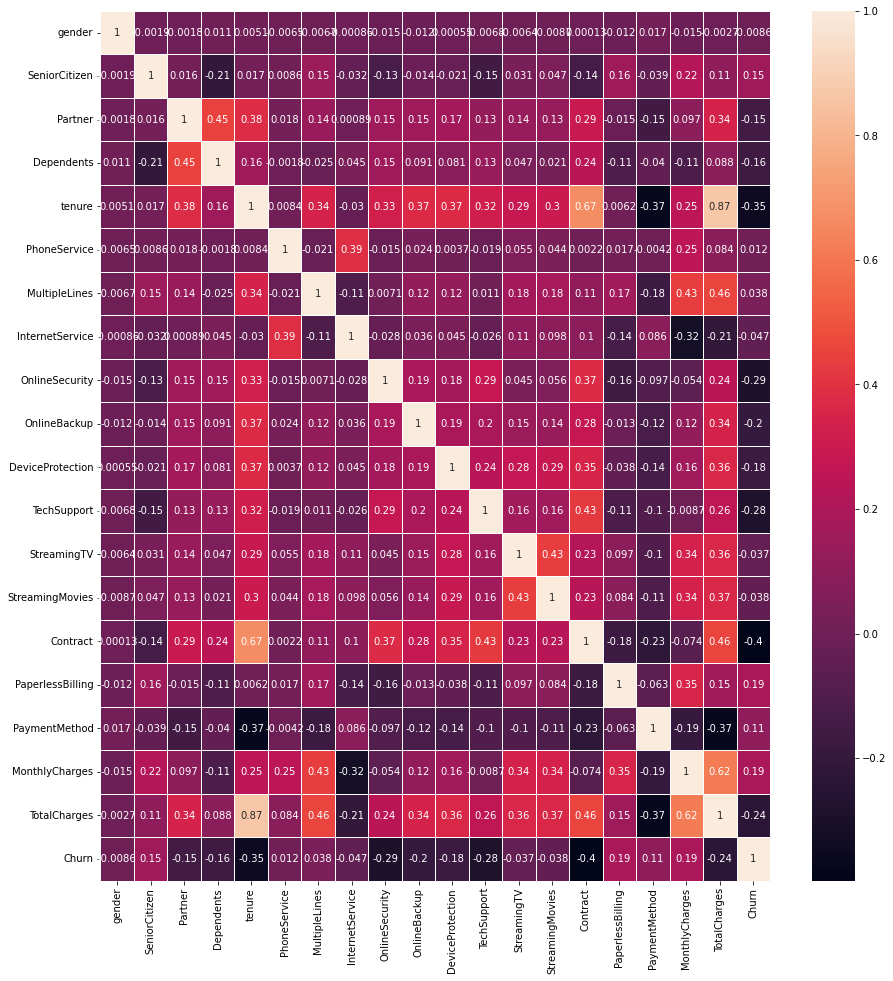

In [112]:
plt.figure(figsize=(15,16))
sns.heatmap(C_corr,annot=True,linewidth=1)
plt.show()


### Visualizing correlation of feature columns with label column.


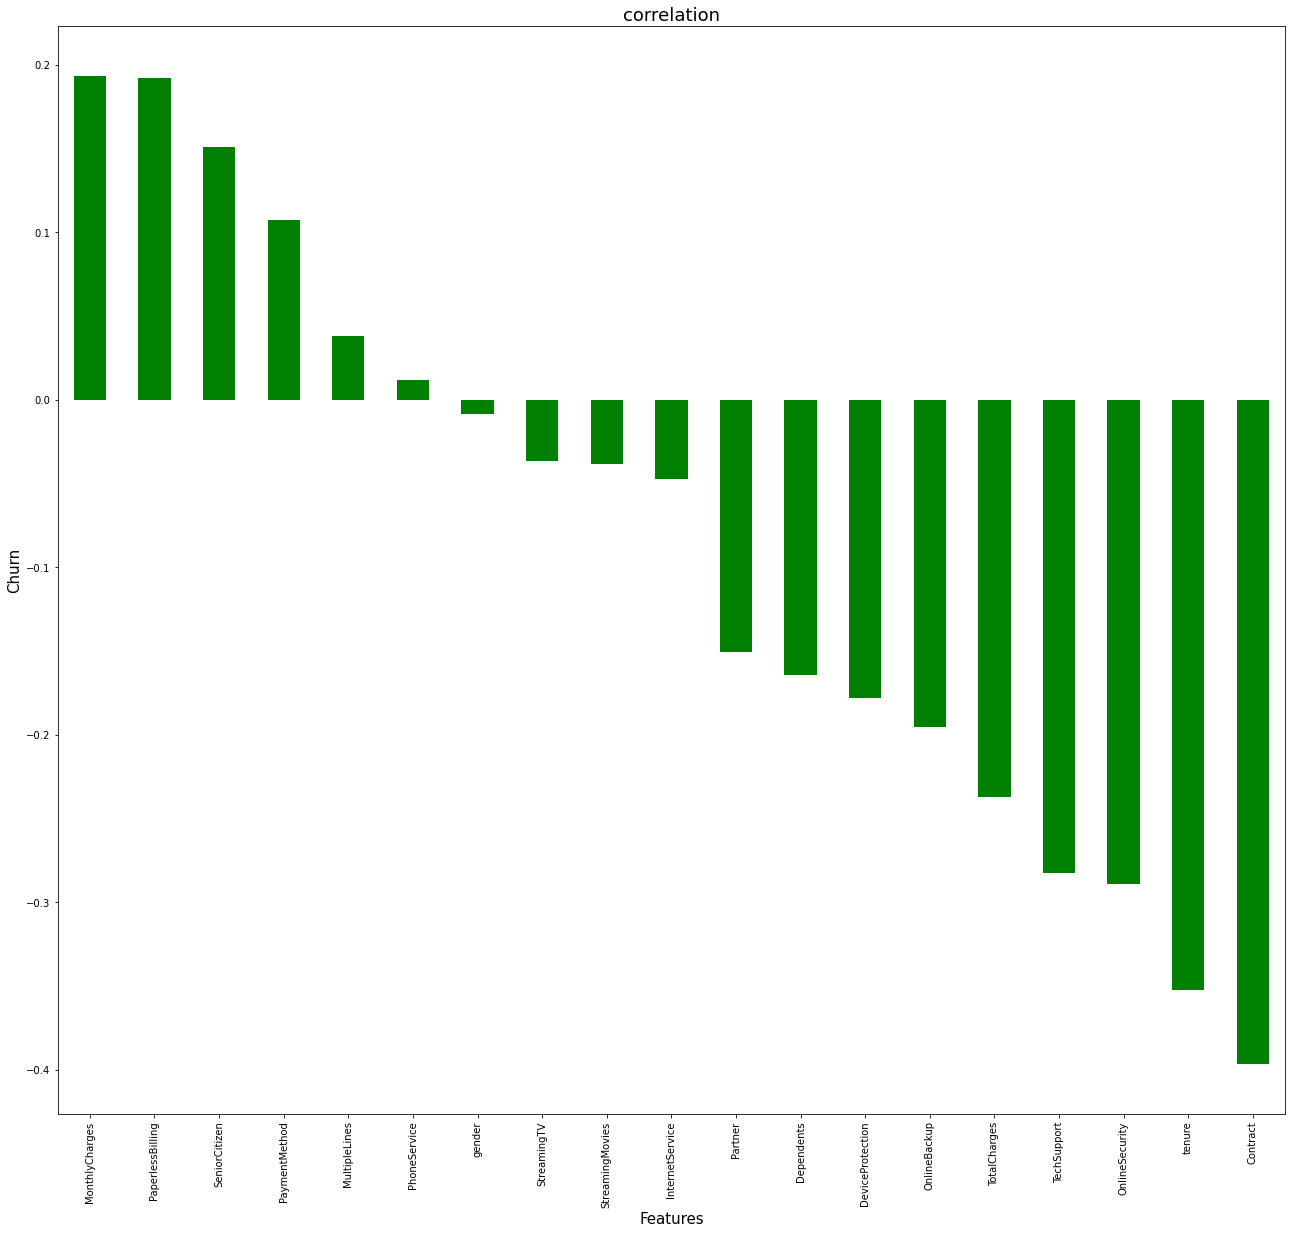

In [116]:
plt.figure(figsize = (22,20))
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Churn',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()


MonthlyCharges,PaperlessBilling, SeniorCitizen have the highest positive correlation with Churn, while Contract,tenure,TechSupport,TotalCharges,OnlineBackup,DeviceProtection have the highest negative correlation with Churn.

### Feature Selection


In [117]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

In [121]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif.head(20)

,Features,vif
0,gender,1.001684
1,SeniorCitizen,1.149730
2,Partner,1.463075
3,Dependents,1.384396
4,tenure,10.690306
5,PhoneService,1.622399
6,MultipleLines,1.397403
7,InternetService,1.866643
8,OnlineSecurity,1.252550
9,OnlineBackup,1.188767


Tenure and TotalCharges have high multi collinearity.

### Principle Component Analysis

In [122]:

from sklearn.decomposition import PCA

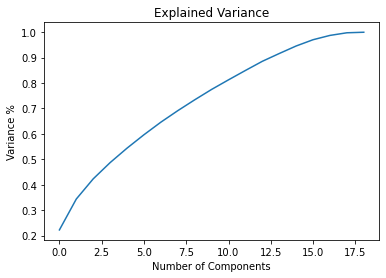

In [123]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()


17 components explain around 95% variance in Data.

### Selecting Kbest Features


In [124]:
from sklearn.feature_selection import SelectKBest, f_classif

In [125]:
bestfeat = SelectKBest(score_func = f_classif, k = 19)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [126]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(20,'Score'))

             Feature        Score
14          Contract  1315.088872
4             tenure   997.268010
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
18      TotalCharges   419.355530
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674
5       PhoneService     1.004266
0             gender     0.522257


In [127]:
x_best = X.drop(columns=['gender','TotalCharges',]).copy() #droping column with lowest score and column with high multicollinearity
scaled_x_best = scaler.fit_transform(x_best)

This is a Classification problem since Target/ Lable column ('Churn') has Catergorical type of Data.


#### Classification Model Building


#### Balancing out classes in Label column 'Churn' using SMOTE technique.

In [128]:
from imblearn.over_sampling import SMOTE as sm
smt_x,smt_y = sm().fit_resample(scaled_x_best,y)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Finding the best random state

In [129]:
from sklearn.ensemble import RandomForestClassifier
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .20, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


Best Accuracy is: 0.866183574879227 on random_state: 24


In [130]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .20,random_state = 90)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

### importing some Base models

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [133]:
RFC = RandomForestClassifier(n_estimators=500, random_state=48, max_depth=4, max_samples=0.1)
DTC = DecisionTreeClassifier()
XGBC= XGBClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC(kernel='linear')
KNN = KNeighborsClassifier()

### Training the Models

In [134]:

RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
DTC.fit(x_train,y_train)
SV.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())


KNeighborsClassifier()

### Logistic Regression

In [135]:
LOGRpred = LOGR.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,LOGRpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, LOGRpred))
print( 'this is the classification report:', classification_report(y_test, LOGRpred))

this is the accuracy _score: 0.7816425120772947
this is  the confusion_matrix: [[801 266]
 [186 817]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      1067
         1.0       0.75      0.81      0.78      1003

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### Random Forest Classifier

In [136]:

RFCpred = RFC.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,RFCpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, RFCpred))
print( 'this is the classification report:', classification_report(y_test, RFCpred))

this is the accuracy _score: 0.7859903381642512
this is  the confusion_matrix: [[785 282]
 [161 842]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      1067
         1.0       0.75      0.84      0.79      1003

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



### Decision Tree Classifier Model Accuracy

In [137]:

DTCpred = DTC.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,DTCpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, DTCpred))
print( 'this is the classification report:', classification_report(y_test, DTCpred))

this is the accuracy _score: 0.7681159420289855
this is  the confusion_matrix: [[797 270]
 [210 793]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      1067
         1.0       0.75      0.79      0.77      1003

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



### XGB Classifier Model Accuracy

In [138]:

XGBCpred = XGBC.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,XGBCpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, XGBCpred))
print( 'this is the classification report:', classification_report(y_test,XGBCpred))


this is the accuracy _score: 0.8458937198067633
this is  the confusion_matrix: [[891 176]
 [143 860]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1067
         1.0       0.83      0.86      0.84      1003

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### SV Classifier Model Accuracy

In [139]:

SVpred = SV.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,SVpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, SVpred))
print( 'this is the classification report:', classification_report(y_test,SVpred))

this is the accuracy _score: 0.7753623188405797
this is  the confusion_matrix: [[787 280]
 [185 818]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1067
         1.0       0.74      0.82      0.78      1003

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



### K Nearest Neighbours Classifier Model Accuracy

In [140]:

KNNpred = KNN.predict(x_test)
print('this is the accuracy _score:', accuracy_score(y_test,KNNpred))
print('this is  the confusion_matrix:',confusion_matrix(y_test, KNNpred))
print( 'this is the classification report:', classification_report(y_test,KNNpred))

this is the accuracy _score: 0.7917874396135266
this is  the confusion_matrix: [[740 327]
 [104 899]]
this is the classification report:               precision    recall  f1-score   support

         0.0       0.88      0.69      0.77      1067
         1.0       0.73      0.90      0.81      1003

    accuracy                           0.79      2070
   macro avg       0.81      0.79      0.79      2070
weighted avg       0.81      0.79      0.79      2070



#### All Model Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score as cvs

### Decision Tree Classifier


In [142]:
print(cvs(DTC,smt_x,smt_y,cv=7).mean())

0.7848048463004258


### Logistic Regression

In [143]:

print(cvs(LOGR,smt_x,smt_y,cv=7).mean()) 

0.7749343309719016


### Random Forest Classifier

In [144]:

print(cvs(RFC,smt_x,smt_y,cv=7).mean())

0.7802506565595768


### XGB Classifier

In [145]:

print(cvs(XGBC,smt_x,smt_y,cv=7).mean())


0.8417304862311684


### SV Classifier

In [146]:

print(cvs(SV,smt_x,smt_y,cv=7).mean())

0.7700043668253546


### K Nearest Neighbours Classifier

In [147]:

print(cvs(KNN,smt_x,smt_y,cv=7).mean())

0.7862445524147785


Based on comparing Accuracy Score results, with Cross Validation results, it is determined that Xgboost Classifier is the best model.

### ROC AUC Scores


#### Logistic Regression

In [148]:
roc_auc_score(y_test,LOGRpred)

0.7826296181745299

#### SV Classifier

In [149]:

roc_auc_score(y_test,SVpred)

0.7765676728016513

#### XGB Classifier

In [150]:

roc_auc_score(y_test,XGBCpred)

0.8462396316206022

#### Random Forest Classifier

In [151]:

roc_auc_score(y_test,RFCpred)

0.7875945733558463

#### K Nearest Neighbours Classifier

In [152]:

roc_auc_score(y_test,KNNpred)

0.79492216882623

#### Decision Tree Classifier

In [153]:

roc_auc_score(y_test,DTCpred)

0.7687910962520126

### ROC AUC curves

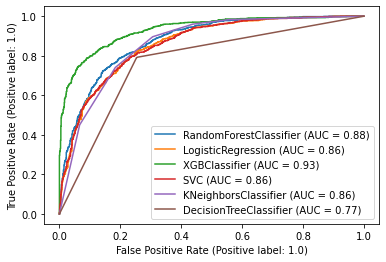

In [154]:

disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,SV,KNN, DTC]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on the above graph and roc_auc_scores,XGB Classifier is the best model for the dataset, with AUC = 0.93 and roc_auc_score = 0.84


### Hyper Parameter Tuning

using Gridsearch Cv

XGB Classifier

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameter = {'booster':["gbtree","gblinear"],
             'eta': [0.01,0.1,0.2,0.3],
             'min_child_weight':np.arange(5),
             'max_depth':[10,20,40,60,80],
             'subsample':[0.5,1]}

In [157]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=6,n_jobs = -1,verbose = 1)

In [158]:
GridCV.fit(x_train,y_train)

Fitting 6 folds for each of 400 candidates, totalling 2400 fits


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'eta': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [10, 20, 40, 60, 80],
                         'min_child_weight': array([0, 1, 2, 3, 4]),
                         'subsample': [0.5, 1]},
             verbose=1)

In [159]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'subsample': 0.5}

In [160]:
Best_mod1 = XGBClassifier(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 2,subsample = 0.5)
Best_mod1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [161]:
xgbpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

84.44444444444444


In [162]:
conf_matrx = confusion_matrix(y_test,xgbpred)
conf_matrx

array([[897, 170],
       [152, 851]], dtype=int64)

### Saving The Model

In [163]:
import joblib
joblib.dump(Best_mod1,"BestModelCustomer_churn.pkl")

['BestModelCustomer_churn.pkl']

### Loading The Model

In [164]:

mod=joblib.load("BestModelCustomer_churn.pkl")

In [165]:
print(mod.predict(x_test))

[1 1 1 ... 0 0 0]


In [166]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(25)

,Predictions,Actual Values
8433,1,1.0
6396,1,0.0
9127,1,1.0
4253,1,0.0
3145,1,1.0
2531,0,0.0
7058,1,1.0
7833,0,1.0
6218,0,0.0
4861,0,0.0
